# Cosine distance with word embedding method for finding similarity between texts.

Using a pre-trained glove file

In [9]:
#glove.6B.50d.txt is a file that consists of all words in english vocabulary clouded in high dimensional space with similar meaning words close 
#to each other
gloveFile = "glove.6B.50d.txt"
import numpy as np
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    print(line)
    return model


In [10]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
import pandas as pd

def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Model is a dictionary that consists of words as keys and their corresponding  high dimensional vectors as the values

In [11]:
def cosine_distance_between_two_words(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))
def calculate_heat_matrix_for_two_sentences(s1,s2):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

# cosine distance with word embedding function for finding similarity between two text.
def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    vector_1 = np.mean([model[word] for word in preprocess(s1)],axis=0)
    vector_2 = np.mean([model[word] for word in preprocess(s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('Word Embedding method with a cosine distance assess that our two sentences are similar to', round((1-cosine)*100,2),'%')

def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    # ax_red = sns.heatmap(df)
    print(cosine_distance_wordembedding_method(s1, s2))
    return ax_blue


Loading Glove Model
Done. 54010  words loaded!
gabby 0.13487 -0.035922 0.017359 -0.90928 0.25475 0.1447 -0.21332 0.16977 -0.41925 0.26584 0.39144 0.5238 0.081097 -0.28697 0.35299 -0.11286 0.24431 0.70801 0.46166 0.31647 -0.6272 0.19544 -0.25661 0.46746 0.31881 0.40607 0.3644 0.69139 0.29472 -0.74204 -0.9342 0.80997 0.43294 -0.058762 0.087757 0.84853 0.13062 -0.30
Word Embedding method with a cosine distance assess that our two sentences are similar to 72.32 %
None


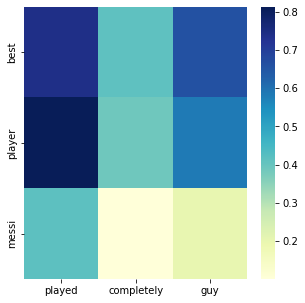

In [12]:
ss1 = 'Messi is the best player.'
ss2 = 'That guy completely played you out.'
model = loadGloveModel(gloveFile)
heat_map_matrix_between_two_sentences(ss1,ss2)
#only 72% similarity as the sentences aren't similar

Loading Glove Model
Done. 63843  words loaded!
empirically 0.98105 -0.97439 0.37746 -0.82669 0.026666 0.66608 0.32043 -0.53875 0.22604 0.94651 1.5533 0.0023154 0.096876 -0.39341 -0.24477 0.39355 0.61739 0.16815 -0.088841 -0.23093 -1.0161 -0.21387 0.9987
Word Embedding method with a cosine distance assess that our two sentences are similar to 95.94 %
None


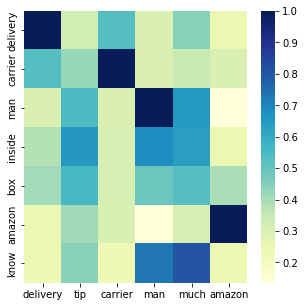

In [19]:
ss1 = 'Does amazon carrier/delivery man know what is inside the box?'
ss2 = 'How much should I tip Amazon carrier/delivery man?'
model = loadGloveModel(gloveFile)
heat_map_matrix_between_two_sentences(ss1,ss2)
#Output = 90.42 %

Loading Glove Model
Done. 58927  words loaded!
baguette 0.57081 -1.0739 -0.39806 -0.94909 0.95599 0.39809 0.4298 -0.37768 -1.0289 -0.28072 -0.017691 -0.46701 -0.094709 0.585 0.098882 -0.92715 -0.32
Word Embedding method with a cosine distance assess that our two sentences are similar to 90.02 %
None


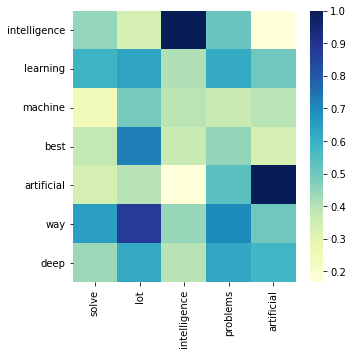

In [15]:
#I tried a bit of repition here
ss1 = 'Machine learning, Deep learning and  Machine learning is the best way to do Artificial Intelligence.'
ss2 = 'Artificial Intelligence will solve a lot of our problems.'
model = loadGloveModel(gloveFile)
heat_map_matrix_between_two_sentences(ss1,ss2)
#output = 90.02 %

Loading Glove Model
Done. 73680  words loaded!
dickensian 0.45321 -0.16606 -1.1177 -0.75499 0.28278 0.14229 0.57678 -0.42942 0.12221 0.829
Word Embedding method with a cosine distance assess that our two sentences are similar to 92.47 %
None


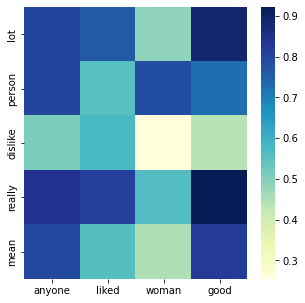

In [23]:
ss1 = 'He is a really mean person and I dislike him a lot.'
ss2 = 'She is not a good woman and is not liked by anyone.'
model = loadGloveModel(gloveFile)
heat_map_matrix_between_two_sentences(ss1,ss2)
#output =  92.47 %